# Vaibhav Khandare - Data Science Intern at LetsGrowMore Virtual Internship Program (October-2021)

# ADVANCED LEVEL TASK 01 - Develop A Neural Network That Can Read Handwriting

In [ ]:
#Importing the libraries that we need to create the model.

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout,Dense,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D
from keras.layers.normalization import BatchNormalization
#Regularizers allow you to apply penalties on layer parameters or layer activity during optimization. 
#These penalties are summed into the loss function that the network optimizes.
#Regularization penalties are applied on a per-layer basis. 
#The exact API will depend on the layer, but many layers (e.g. Dense, Conv1D, Conv2D and Conv3D) have a unified API.
from keras.regularizers import l2
from keras.datasets import mnist
from keras.utils import np_utils
import keras

In [2]:
# loads the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
#split the data into train and test
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

In [7]:
# Lets store the number of rows and columns
img_rows = X_train[0].shape[0]
img_cols = X_train[1].shape[0]

In [8]:
img_rows

28

In [9]:
img_cols

28

In [10]:
# Getting our date in the right 'shape' needed for Keras
# We need to add a 4th dimenion to our date thereby changing our
# Our original image shape of (60000,28,28) to (60000,28,28,1)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

In [11]:
X_train.shape

(60000, 28, 28, 1)

In [12]:
X_test.shape

(10000, 28, 28, 1)

In [13]:
# store the shape of a single image 
input_shape = (img_rows, img_cols, 1)

In [14]:
input_shape

(28, 28, 1)

In [15]:
# change our image type to float32 data type
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [16]:
# Normalize our data by changing the range from (0 to 255) to (0 to 1)
X_train /= 255
X_test /= 255

In [17]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [18]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [19]:
# Now we one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)



In [20]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [21]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [22]:
num_classes = y_test.shape[1]
num_pixels = X_train.shape[1] * X_train.shape[2]

In [23]:
num_classes

10

In [24]:
num_pixels

784

Now let's create our layers to replicate LeNet

In [25]:
# create model
model = Sequential()

# 2 sets of CRP (Convolution, RELU, Pooling)
model.add(Conv2D(20, (5, 5),
                 padding = "same", 
                 input_shape = (28,28,1)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2) ))

model.add(Conv2D(50, (5, 5),
                 padding = "same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

# Fully connected layers (w/ RELU)
model.add(Flatten())
          
# FC NN
model.add(Dense(500))
model.add(Activation("relu"))

# Softmax (for classification)
model.add(Dense(num_classes))
model.add(Activation("softmax"))
           
model.compile(loss = 'categorical_crossentropy',
              optimizer = keras.optimizers.Adadelta(),
              metrics = ['accuracy'])
    
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 20)        520       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 20)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 50)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2450)              0

Now let us train LeNet on our MNIST Dataset

In [26]:
# Training Parameters
batch_size = 128
epochs = 10

history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test),
          shuffle=True)

model.save("mnist_LeNet.h5")


Epoch 1/10
469/469 [==============================] - 84s 112ms/step - loss: 2.2910 - accuracy: 0.1478 - val_loss: 2.2527 - val_accuracy: 0.2442
Epoch 2/10
469/469 [==============================] - 53s 112ms/step - loss: 2.2415 - accuracy: 0.2631 - val_loss: 2.1959 - val_accuracy: 0.3910
Epoch 3/10
469/469 [==============================] - 56s 119ms/step - loss: 2.1825 - accuracy: 0.4186 - val_loss: 2.1247 - val_accuracy: 0.5714
Epoch 4/10
469/469 [==============================] - 56s 119ms/step - loss: 2.1073 - accuracy: 0.5849 - val_loss: 2.0263 - val_accuracy: 0.6895
Epoch 5/10
469/469 [==============================] - 54s 115ms/step - loss: 2.0018 - accuracy: 0.6931 - val_loss: 1.8869 - val_accuracy: 0.7552
Epoch 6/10
469/469 [==============================] - 55s 117ms/step - loss: 1.8543 - accuracy: 0.7448 - val_loss: 1.6983 - val_accuracy: 0.7848
Epoch 7/10
469/469 [==============================] - 53s 114ms/step - loss: 1.6562 - accuracy: 0.7710 - val_loss: 1.4669 - val_ac

In [27]:
# Evaluate the performance of our trained model
scores = model.evaluate(X_test, y_test, verbose=1)
print(X_test)
print(y_test)


313/313 [==============================] - 4s 13ms/step - loss: 0.8614 - accuracy: 0.8270
[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...

In [28]:
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.8614441156387329
Test accuracy: 0.8270000219345093


In [29]:
import matplotlib.pyplot as plt

In [30]:
img = X_train[2]

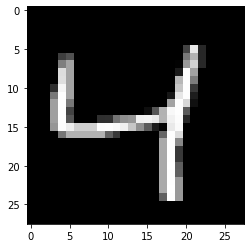

In [31]:
img = X_train[2]
plt.imshow(img , cmap='gray')

In [32]:
img_test = X_test[12]

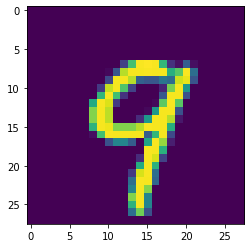

In [33]:
plt.imshow(img_test)

In [34]:
img_test.shape

(28, 28, 1)

In [35]:
#now we have to reshape it 
img_test_1d = img_test.reshape(-1, 28,28,1)

In [36]:
img_test_1d.shape

(1, 28, 28, 1)

In [37]:
img_pred = model.predict(img_test_1d)


In [38]:
img_pred

array([[0.00877212, 0.01538338, 0.0064323 , 0.01173244, 0.21539558,
        0.03569568, 0.03497786, 0.09420351, 0.08198188, 0.49542525]],
      dtype=float32)

In [39]:
img_pre = img_pred*100

In [40]:
#now it means it is a img of 9
img_pre

array([[ 0.87721217,  1.5383378 ,  0.6432298 ,  1.1732436 , 21.539558  ,
         3.569568  ,  3.4977865 ,  9.420351  ,  8.198188  , 49.542526  ]],
      dtype=float32)